In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [3]:
df = pd.read_csv("CarSharing.csv")
print(df.shape)
print(df.head())
print(df.info())


(8760, 14)
  record_date  car_rental_count  hour_of_day  temp_celsius  humidity_percent  \
0  01-12-2017               254            0          -5.2                37   
1  01-12-2017               204            1          -5.5                38   
2  01-12-2017               173            2          -6.0                39   
3  01-12-2017               107            3          -6.2                40   
4  01-12-2017                78            4          -6.0                36   

   wind_speed_mps  visibility_10m  dew_point_celsius  solar_energy_mj_m2  \
0             2.2            2000              -17.6                 0.0   
1             0.8            2000              -17.6                 0.0   
2             1.0            2000              -17.7                 0.0   
3             0.9            2000              -17.6                 0.0   
4             2.3            2000              -18.6                 0.0   

   rain_mm  snow_cm season_label is_Holiday is_work

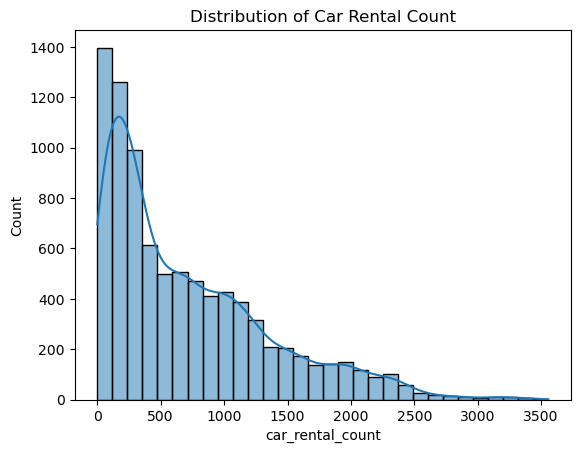

In [4]:
sns.histplot(df['car_rental_count'], kde=True, bins=30)
plt.title("Distribution of Car Rental Count")
plt.show()


In [5]:
df['record_date'] = pd.to_datetime(df['record_date'], dayfirst=True)

# Extract date features
df['year'] = df['record_date'].dt.year
df['month'] = df['record_date'].dt.month
df['day'] = df['record_date'].dt.day
df['day_of_week'] = df['record_date'].dt.dayofweek


In [6]:
# Convert Yes/No to binary
df['is_Holiday'] = df['is_Holiday'].map({'Yes': 1, 'No': 0})
df['is_working_day'] = df['is_working_day'].map({'Yes': 1, 'No': 0})

# Season label (Winter, Spring,autumn,summer)
encoder = LabelEncoder()
df['season_label'] = encoder.fit_transform(df['season_label'])


In [7]:
df.head()

record_date  car_rental_count  hour_of_day  temp_celsius  humidity_percent  \
0  2017-12-01               254            0          -5.2                37   
1  2017-12-01               204            1          -5.5                38   
2  2017-12-01               173            2          -6.0                39   
3  2017-12-01               107            3          -6.2                40   
4  2017-12-01                78            4          -6.0                36   

   wind_speed_mps  visibility_10m  dew_point_celsius  solar_energy_mj_m2  \
0             2.2            2000              -17.6                 0.0   
1             0.8            2000              -17.6                 0.0   
2             1.0            2000              -17.7                 0.0   
3             0.9            2000              -17.6                 0.0   
4             2.3            2000              -18.6                 0.0   

   rain_mm  snow_cm  season_label  is_Holiday  is_working_day  year  month  \
0      0.0      0.0             3           0               1  2017     12   
1      0.0      0.0             3           0               1  2017     12   
2      0.0      0.0             3           0               1  2017     12   
3      0.0      0.0             3           0               1  2017     12   
4      0.0      0.0             3           0               1  2017     12   

   day  day_of_week  
0    1            4  
1    1            4  
2    1            4  
3    1            4  
4    1            4

In [8]:
df = df.drop(columns=['record_date'], errors='ignore')


In [9]:
df.head()

car_rental_count  hour_of_day  temp_celsius  humidity_percent  \
0               254            0          -5.2                37   
1               204            1          -5.5                38   
2               173            2          -6.0                39   
3               107            3          -6.2                40   
4                78            4          -6.0                36   

   wind_speed_mps  visibility_10m  dew_point_celsius  solar_energy_mj_m2  \
0             2.2            2000              -17.6                 0.0   
1             0.8            2000              -17.6                 0.0   
2             1.0            2000              -17.7                 0.0   
3             0.9            2000              -17.6                 0.0   
4             2.3            2000              -18.6                 0.0   

   rain_mm  snow_cm  season_label  is_Holiday  is_working_day  year  month  \
0      0.0      0.0             3           0               1  2017     12   
1      0.0      0.0             3           0               1  2017     12   
2      0.0      0.0             3           0               1  2017     12   
3      0.0      0.0             3           0               1  2017     12   
4      0.0      0.0             3           0               1  2017     12   

   day  day_of_week  
0    1            4  
1    1            4  
2    1            4  
3    1            4  
4    1            4

In [10]:
# Check missing values in all columns
print(df.isnull().sum())


car_rental_count      0
hour_of_day           0
temp_celsius          0
humidity_percent      0
wind_speed_mps        0
visibility_10m        0
dew_point_celsius     0
solar_energy_mj_m2    0
rain_mm               0
snow_cm               0
season_label          0
is_Holiday            0
is_working_day        0
year                  0
month                 0
day                   0
day_of_week           0
dtype: int64


In [11]:
X = df.drop(columns=['car_rental_count','dew_point_celsius',])
y = df['car_rental_count']


In [12]:
# Identify numerical and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns

# Fill numerical missing values
X[num_cols] = X[num_cols].fillna(X[num_cols].median())

# Fill categorical missing values only if cat_cols is not empty
if len(cat_cols) > 0:
    X[cat_cols] = X[cat_cols].fillna(X[cat_cols].mode().iloc[0])


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
from sklearn.linear_model import LinearRegression
# Linear Regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)


In [16]:
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.01)

ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)
y_pred_lasso = lasso.predict(X_test_scaled)


In [17]:
from sklearn.ensemble import RandomForestRegressor
#Ramdom Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [18]:
from sklearn.ensemble import GradientBoostingRegressor
#Gradient Boosting 
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)


In [19]:
def evaluate_model(y_test, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} → RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.3f}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_gbr, "Gradient Boosting")


Linear Regression → RMSE: 440.68, MAE: 330.53, R²: 0.534
Ridge Regression → RMSE: 440.68, MAE: 330.52, R²: 0.534
Lasso Regression → RMSE: 440.68, MAE: 330.52, R²: 0.534
Random Forest → RMSE: 172.78, MAE: 97.54, R²: 0.928
Gradient Boosting → RMSE: 213.50, MAE: 138.15, R²: 0.891


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# GridSearchCV
grid = GridSearchCV(RandomForestRegressor(random_state=42),
                    param_grid,
                    cv=3,
                    scoring='neg_root_mean_squared_error',
                    n_jobs=-1)

# Fit model
grid.fit(X_train, y_train)

# Best parameters and estimator
print("Best Parameters:", grid.best_params_)
best_rf = grid.best_estimator_


Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [21]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 400),
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_root_mean_squared_error',
    cv=3,
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FF12105BD0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FF12106FD0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FF120078C0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = best_rf.predict(X_test)

# RMSE and R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Optimized RMSE: {rmse:.2f}")
print(f"Optimized R² Score: {r2:.3f}")


Optimized RMSE: 173.39
Optimized R² Score: 0.928


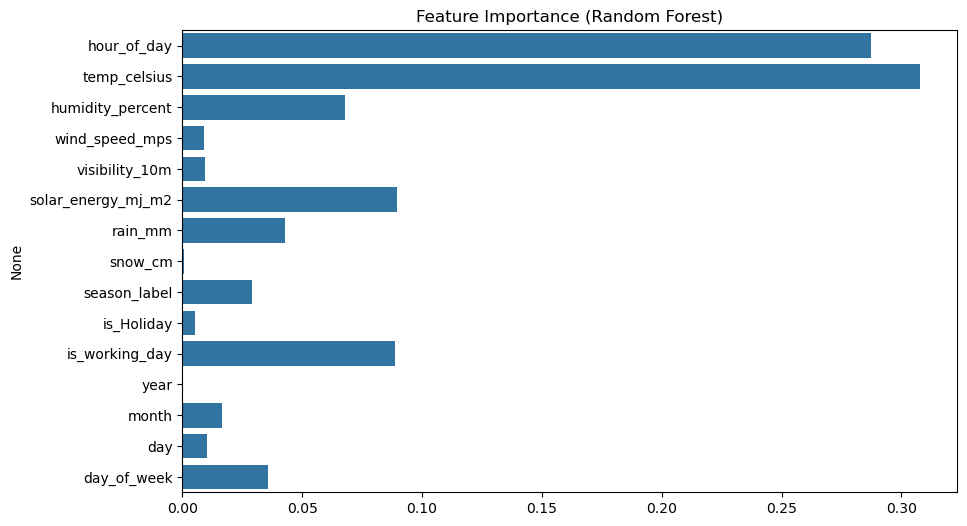

In [23]:
importances = best_rf.feature_importances_
features = X.columns
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Random Forest)")
plt.show()


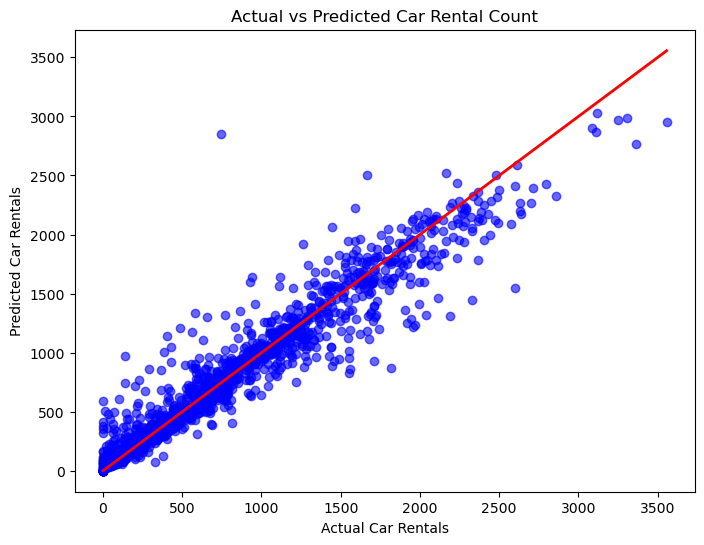

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel("Actual Car Rentals")
plt.ylabel("Predicted Car Rentals")
plt.title("Actual vs Predicted Car Rental Count")
plt.show()


In [25]:
import pandas as pd

# data for prediction
sample_data = pd.DataFrame([{
    'hour_of_day': 10,
    'temp_celsius': 25.0,
    'humidity_percent': 60,
    'wind_speed_mps': 2.5,
    'visibility_10m': 1900,
    'solar_energy_mj_m2': 1.2,
    'rain_mm': 0.0,
    'snow_cm': 0.0,
    'season_label': 2,
    'is_Holiday': 0,
    'is_working_day': 1,
    'year': 2018,
    'month': 6,
    'day': 15,
    'day_of_week': 4
}])


# Make prediction using your trained model
predicted_rentals = best_rf.predict(sample_data)

print("Predicted number of cars rented:", int(predicted_rentals[0]))


Predicted number of cars rented: 1045
